# Navigation

---

This notebook contains the front end code for my navigation project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

Nothing between here and section 4.1 has substantially changed from what was assigned, in either the markdown, or the code.  The assignment starts in section 4.1 with training the agent.

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env_path = "C:\\Users\\scotth\\Google Drive\\deep-reinforcement-learning\\p1_navigation\\Banana_Windows_x86_64\\Banana.exe"
env = UnityEnvironment(file_name=env_path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
#env.close()  #commented out because it doesn't appear possible to re instantiate an environment below.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Nothing above here is substantially changed from what was provided in the lesson.  The code below and the two python files model.py and dqn_agent.py are the code either written by me or borrowed from previous lessons.

#### 4.1
Here we train the network.  There are two supporting files, model.py and dqn_agent.py

<bound method Module.parameters of QNetwork(
  (fc1): Linear(in_features=37, out_features=81, bias=True)
  (fc2): Linear(in_features=81, out_features=69, bias=True)
  (fc3): Linear(in_features=69, out_features=4, bias=True)
)>
Episode 352	 elapsed: 0:09:48.425219	Ave. Score: 13.07 	score 19.0 	scores >= 13: 50 	eps.: 0.02terminating at episode : 352 ave reward reached +13 over 100 episodes


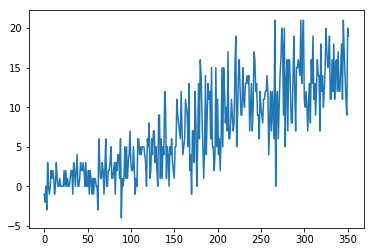

In [9]:
import time
import math
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline 
run = 0

agent = Agent(state_size=37, action_size=4, seed=1, fc1_units = 81, fc2_units = 69)

def dqn(n_episodes=2000, max_t=1000, eps_start=.99, eps_end=0.01, eps_decay = .996, run = 0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    start_time = time.time()                               #just grabbing the start time so cause it will
                                                           #make me feel better when I ask are we done yet.
    scores = [] #scores from each episode
    scores_window = deque(maxlen=100)                      #last 100 scores
    eps = eps_start #epsilon

    for i_episode in range(1, n_episodes+1):               #main for loop
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]            # get the current state 
        score = 0                                          # reset the score counter
        done = False                                       # are we done yet?
        while not done:                                    # play time
            action = agent.act(state,eps)                  # what should we do, I'm surrounded by bananas
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state,action,reward,next_state, done) # what can we learn from our actions?
            score += reward                                # count our rewards
            state = next_state                             # needed to make q update work - the whole temporal differnce thing
            if done:                                       # are we done yet?
                break                                      # yes, with the game anyway
        scores_window.append(score)                        # add score to the buffer so we can calc mean over 100
        scores.append(score)
        eps = max(eps_end,eps_decay*eps)                   # make epsilon a wee bit smaller

        count = 0                                          #note terribly useful.  Merely used to tell us how many times we've reached 100
        for j in range(len(scores_window)):                #are we there yet? no idea, but we've hit 13 x times.
            if scores_window[j] >= 13:
                count+=1
        elapsed = datetime.timedelta(seconds = time.time()-start_time)  # are we there yet?  No idea, but we started 5 minutes ago
        print('\rEpisode {}\t elapsed: {}\tAve. Score: {:.2f} \tscore {} \tscores >= 13: {} \teps.: {:.2f}'.format(i_episode, elapsed,np.mean(scores_window),score, count,eps), end="")
        if np.mean(scores_window) >=13:  #this is where we check to see if we have met the completion criteria.
            print("terminating at episode :", i_episode, "ave reward reached +13 over 100 episodes")
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint'+str(run)+'.pth') # save the weights so we don't have to train again to see our agent in action
    return scores,i_episode

scores, episodes = dqn(eps_start = .1,run=run)           #i'm not sure I actually used episodes in the end
plt.plot(scores)


In [6]:
print(scores)

[]


#### 4.2 Loop through some training with randomly selected hyper parameters.
The code below was used to loop through some hyper parameters.

Note: this is an infinite loop.  You will have to interrupt the kernel when you get bored with it.  

In [ ]:
done = False
run = 1
run_stats = []
while not done:
    fc1_u = np.random.randint(37,256)                        #generate random number of nodes
    fc2_u = np.random.randint(8,fc1_u)                       #more random nodes
    eps_s = np.random.rand()                                 #randomly initialize epsilon, (this turned out to be the most intersting of the three)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units = fc1_u, fc2_units = fc2_u)
    print('run', run, 'eps_s',eps_s)
    scores, episodes = dqn(n_episodes = 2000, eps_start = eps_s,run=run)  #start learning with new parameters
    print("\n-------------------------\n")
    plt.plot(scores)
    plt.show()
    print("-------------------------\n")
    run +=1
    run_stats.append([run,episodes,fc1_u,fc2_u,eps_s])       #This could be useful if you let this cell run for a long time.

#### 4.3 Finally see a trained agent work.  
The weights are saved by run number.  If you want to see how a particular agent performs, change the checkpoint file name to the run you want to see.

In [8]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint0.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state,.05)                  # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 11.0


In [9]:
env.close()